In [1]:
# © "Himanshu Yadav" or "kr4T0X" or "KratoSkills"

In [2]:
################################################
'''
This is a test code to learn implementation of simple linear regression from scratch.
'''
'''
This model predicts CLOSE price based upon OPEN price
'''

'\nThis model predicts CLOSE price based upon OPEN price\n'

In [3]:
################################################
# Importing necessary libraries
import re
import pandas as pd
from tvDatafeed import TvDatafeed, Interval
from matplotlib import pyplot as plt
import numpy as np

In [4]:
################################################
# Taking and formatting user input regarding which data to get.

symbol = input("Enter symbol (eg: THETAUSDTPERP, BANKNIFTY, etc.): ").upper()

exchange = input("Enter exchange (eg: BINANCE, BSE, NSE, etc.): ").upper()

print("Which candle data? (Supported: (1/3/5/15/30/45 min), (1/2/3/4 hour),  1 day, 1 week, 1 month)")
interval = input("(eg: 5min, 1hour, 1day, etc.): ")
interval = re.findall("^([0-9]*)([a-z]*)", interval)
if (interval[0][1] == "min"):
    if (int(interval[0][0]) == 1): interval = Interval.in_1_minute
    elif (int(interval[0][0]) == 3): interval = Interval.in_3_minute
    elif (int(interval[0][0]) == 5): interval = Interval.in_5_minute
    elif (int(interval[0][0]) == 15): interval = Interval.in_15_minute
    elif (int(interval[0][0]) == 30): interval = Interval.in_30_minute
    elif (int(interval[0][0]) == 45): interval = Interval.in_45_minute
elif (interval[0][1] == "hour"):
    if (int(interval[0][0]) == 1): interval = Interval.in_1_hour
    elif (int(interval[0][0]) == 2): interval = Interval.in_2_hour
    elif (int(interval[0][0]) == 3): interval = Interval.in_3_hour
    elif (int(interval[0][0]) == 4): interval = Interval.in_4_hour
elif (interval[0][1] == "day"): interval = Interval.in_daily
elif (interval[0][1] == "week"): interval = Interval.in_weekly
elif (interval[0][1] == "month"): interval = Interval.in_monthly

n_bars = int(input("How much data? (eg: 100, 360, 1000, 2500,....max 5000): "))

Which candle data? (Supported: (1/3/5/15/30/45 min), (1/2/3/4 hour),  1 day, 1 week, 1 month)


In [5]:
#############################################
# Getting and Storing Data in an excel file.

tv = TvDatafeed(auto_login=False)

data = tv.get_hist(symbol=symbol, exchange=exchange, interval=interval, n_bars=n_bars)

data.to_excel('D:\My Projects\Python\Linear Regression\PRICE PREDICTION\{}.xlsx'.format(symbol))

In [6]:
#############################################
# Implement linear regression

# Finding relationship between time and OHLC (seperately) from our data
#SOURCE: https://towardsdatascience.com/linear-regression-from-scratch-cd0dee067f72

In [7]:
# initializing our inputs and outputs Dataset
# INPUT
inp = data["open"].values

# OUTPUT
out = data["close"].values

In [8]:
# mean of our inputs and outputs
inp_mean = np.mean(inp)
out_mean = np.mean(out)

In [9]:
# Training Data length = np.shape(inp)[0]
print(np.shape(inp)[0])

5000


In [10]:
# using the formula to calculate the 'm' and 'c'
'''
y = m*x + c. This is a line where 'y' is the output variable we want to predict, 'x' is the input variable we know and 
'c' and 'm' are coefficients that we need to estimate that move the line around.
Technically, 'c' is called the INTERCEPT because it determines where the line intercepts the 'y-axis'.
The 'm' term is called the SLOPE because it defines the slope of the line or how 'x' translates into a 'y' value before we add our bias.
'''
numerator = 0
denominator = 0
for i in range(np.shape(inp)[0]):
    numerator += (inp[i] - inp_mean) * (out[i] - out_mean)
    denominator += (inp[i] - inp_mean) ** 2
    
m = numerator / denominator
c = out_mean - (m * inp_mean)
#printing the coefficient
print("m =", m, "-- this is our 'weight'", "\nc =", c, "-- this is our 'bias'")

m = 0.9992898481837839 -- this is our 'weight' 
c = 26.995077357871196 -- this is our 'bias'


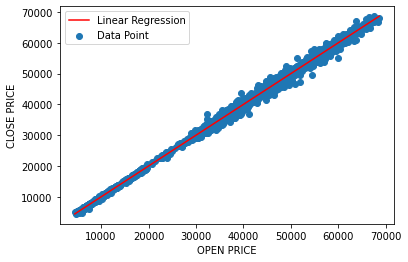

In [11]:
#plotting values 
inp_max = np.max(inp) + 100
inp_min = np.min(inp) - 100
#calculating line values of x and y
x = np.linspace(inp_min, inp_max, 1000)
y = c + m * x
#plotting line 
plt.plot(x, y, label='Linear Regression', color='red')
#plot the data point
plt.scatter(inp, out, label='Data Point')
# x-axis label
plt.xlabel('OPEN PRICE')
#y-axis label
plt.ylabel('CLOSE PRICE')
plt.legend()
plt.show()

In [12]:
#Error as Root Mean Square Error, RMSE
rmse = 0
for i in range(np.shape(inp)[0]):
    y_pred=  c + m* inp[i]
    rmse += (out[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n_bars)
#print("RMS Error = ", rmse)
print("% error in model =", 100 - ((out_mean-rmse)/out_mean*100))

% error in model = 1.8677171514763842


In [13]:
# Finding coefficient of Determination (R² Score)
'''
R² score measure the accuracy of our linear model, mathematically : R² = SSR/SST
SST is the total sum of squares and SSR is the total sum of squares of residuals.
R² Score usually ranges from 0 to 1. It will also become negative if the model is completely wrong.
'''
'''
we can improve the score by :
    Getting more datasets
    Improving the features
    Fit many models etc
'''
sumofsquares = 0
sumofresiduals = 0
for i in range(np.shape(inp)[0]) :
    y_pred = c + m * inp[i]
    sumofsquares += (out[i] - out_mean) ** 2
    sumofresiduals += (out[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print("Coefficient of Determination =",score)

Coefficient of Determination = 0.9988849689285729


In [14]:
# © "Himanshu Yadav" or "kr4T0X" or "KratoSkills"